## 1st Module: Basic Stats_1

In [2]:
# Imports
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Read Dataset
df = pd.read_csv('/content/drive/MyDrive/DS Assignment/Basic stats - 1/sales_data_with_discounts.csv')

In [5]:
# Display first 5 rows to understand structure
df.head()

,Date,Day,SKU,City,Volume,BU,Brand,Model,Avg Price,Total Sales Value,Discount Rate (%),Discount Amount,Net Sales Value
0,01-04-2021,Thursday,M01,C,15,Mobiles,RealU,RU-10,12100,181500,11.654820,21153.498820,160346.501180
1,01-04-2021,Thursday,M02,C,10,Mobiles,RealU,RU-9 Plus,10100,101000,11.560498,11676.102961,89323.897039
2,01-04-2021,Thursday,M03,C,7,Mobiles,YouM,YM-99,16100,112700,9.456886,10657.910157,102042.089843
3,01-04-2021,Thursday,M04,C,6,Mobiles,YouM,YM-99 Plus,20100,120600,6.935385,8364.074702,112235.925298
4,01-04-2021,Thursday,M05,C,3,Mobiles,YouM,YM-98,8100,24300,17.995663,4372.946230,19927.053770


In [4]:
# Select numerical columns only
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns


In [5]:
print("Numerical Columns:")
print(numerical_cols)

Numerical Columns:
Index(['Volume', 'Avg Price', 'Total Sales Value', 'Discount Rate (%)',
       'Discount Amount', 'Net Sales Value'],
      dtype='object')


In [8]:
## get all columns
df.describe(include='all')

,Volume,Avg Price,Total Sales Value,Discount Rate (%),Discount Amount,Net Sales Value
count,450.000000,450.000000,450.000000,450.000000,450.000000,450.000000
mean,5.066667,10453.433333,33812.835556,15.155242,3346.499424,30466.336131
std,4.231602,18079.904840,50535.074173,4.220602,4509.902963,46358.656624
min,1.000000,290.000000,400.000000,5.007822,69.177942,326.974801
25%,3.000000,465.000000,2700.000000,13.965063,460.459304,2202.208645
50%,4.000000,1450.000000,5700.000000,16.577766,988.933733,4677.788059
75%,6.000000,10100.000000,53200.000000,18.114718,5316.495427,47847.912852
max,31.000000,60100.000000,196400.000000,19.992407,25738.022194,179507.479049


In [9]:
# statistical summary dataframe
stats_df = pd.DataFrame({
    "Mean": df[numerical_cols].mean(),
    "Median": df[numerical_cols].median(),
    "Mode": df[numerical_cols].mode().iloc[0],
    "Minimum": df[numerical_cols].min(),
    "Maximum": df[numerical_cols].max(),
    "Range": df[numerical_cols].max() - df[numerical_cols].min(),
    "Standard Deviation": df[numerical_cols].std()
})

In [10]:
stats_df

,Mean,Median,Mode,Minimum,Maximum,Range,Standard Deviation
Volume,5.066667,4.000000,3.000000,1.000000,31.000000,30.000000,4.231602
Avg Price,10453.433333,1450.000000,400.000000,290.000000,60100.000000,59810.000000,18079.904840
Total Sales Value,33812.835556,5700.000000,24300.000000,400.000000,196400.000000,196000.000000,50535.074173
Discount Rate (%),15.155242,16.577766,5.007822,5.007822,19.992407,14.984585,4.220602
Discount Amount,3346.499424,988.933733,69.177942,69.177942,25738.022194,25668.844251,4509.902963
Net Sales Value,30466.336131,4677.788059,326.974801,326.974801,179507.479049,179180.504248,46358.656624


In [ ]:
# brief interpretation of these statistics.

'Mean represents the average sales and discount values, providing an overall measure of central tendency of the dataset.'
'Median indicates the middle value of the data and helps understand the distribution without being affected by extreme values. If the mean is higher than the median, it suggests the data is positively skewed.'
'Mode identifies the most frequently occurring values, which is useful for recognizing commonly applied discount rates or frequently sold price points.'
'Standard Deviation measures the variability in the data. A high standard deviation indicates large fluctuations in sales and discounts, while a low value suggests consistency in pricing and sales performance.'
'Large differences between mean and median suggest skewed sales distribution caused by high-value products and seasonal promotions.'

In [21]:
# Visualization

import matplotlib.pyplot as plt
import matplotlib.colors as cs  # Color handling
import seaborn as sns
sns.set_theme(style="whitegrid") # a clean visualization style

In [36]:
# EDA
# EDA involves understanding, cleaning, and summarizing the data before applying visualization and modeling techniques.

In [29]:
# Dataset overview
df.shape

(450, 13)

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 450 entries, 0 to 449
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Date               450 non-null    object 
 1   Day                450 non-null    object 
 2   SKU                450 non-null    object 
 3   City               450 non-null    object 
 4   Volume             450 non-null    int64  
 5   BU                 450 non-null    object 
 6   Brand              450 non-null    object 
 7   Model              450 non-null    object 
 8   Avg Price          450 non-null    int64  
 9   Total Sales Value  450 non-null    int64  
 10  Discount Rate (%)  450 non-null    float64
 11  Discount Amount    450 non-null    float64
 12  Net Sales Value    450 non-null    float64
dtypes: float64(3), int64(3), object(7)
memory usage: 45.8+ KB


In [23]:
#### missing_values
df.isnull().sum()

,0
Date,0
Day,0
SKU,0
City,0
Volume,0
BU,0
Brand,0
Model,0
Avg Price,0
Total Sales Value,0


In [25]:
### check duplicates
df.duplicated().sum()

np.int64(0)

<Axes: >

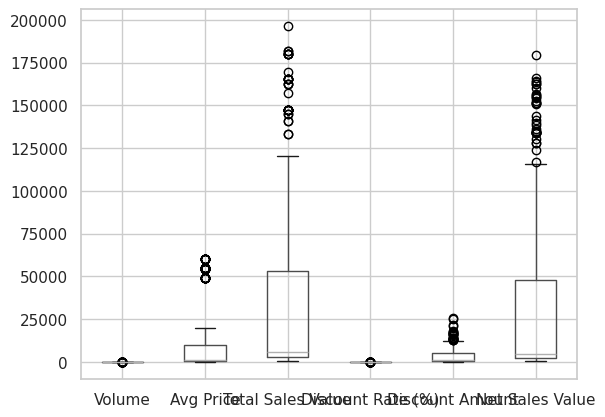

In [7]:
## check Outliers
df.boxplot()

In [9]:
## outliers removed
def outlier_capping(df,columns):
    Q1= df[columns].quantile(0.25)
    Q3= df[columns].quantile(0.75)
    IQR= Q3-Q1
    lower_extreme= Q1-1.5*IQR
    upper_extreme= Q3+1.5*IQR
    df[columns]=df[columns].apply(lambda x: lower_extreme if x<lower_extreme else upper_extreme if x>upper_extreme else x)
for col in df.select_dtypes(include=['int','float']).columns:
    outlier_capping(df,col)



<Axes: >

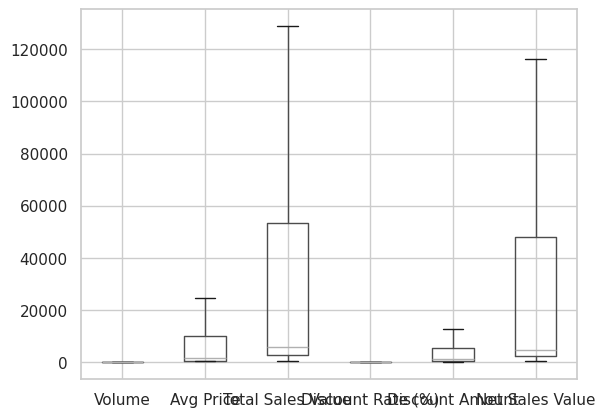

In [10]:
df.boxplot()

In [37]:
#The dataset contains 450 records and 13 columns.
#No missing or duplicate values were found.
#The dataset is suitable for further exploratory analysis.

In [11]:
# Identify categorical variables
categorical_cols = df.select_dtypes(include=['object', 'category']).columns

print("Categorical Variables:")
print(categorical_cols)


Categorical Variables:
Index(['Date', 'Day', 'SKU', 'City', 'BU', 'Brand', 'Model'], dtype='object')


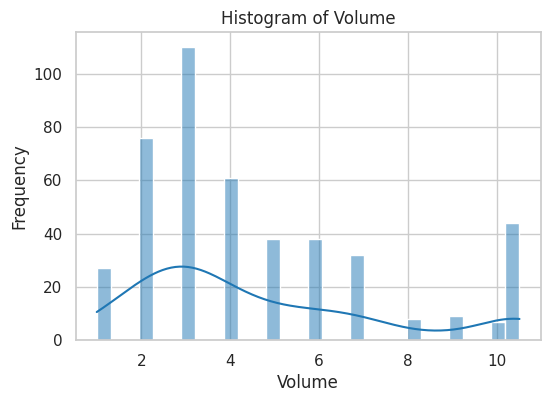

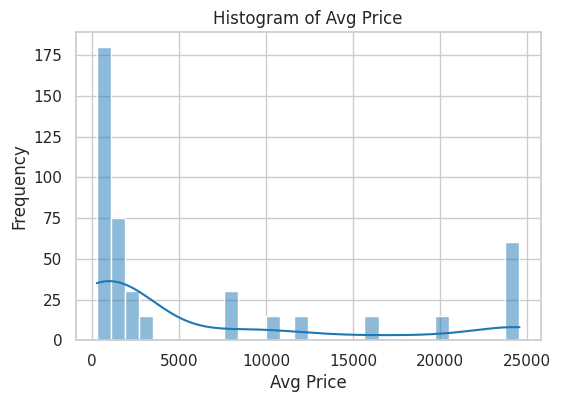

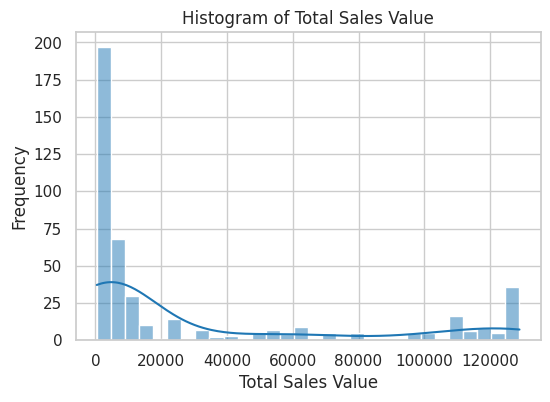

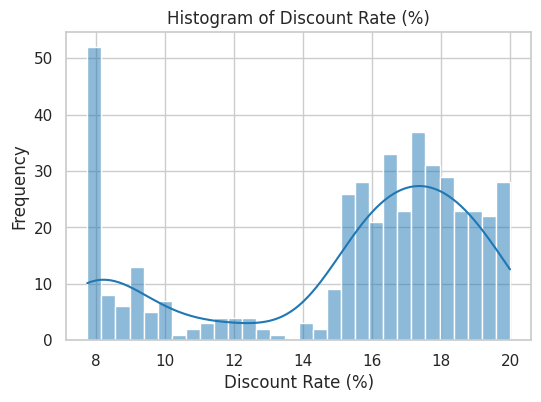

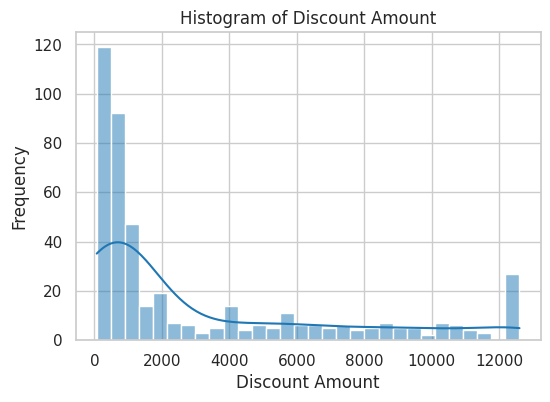

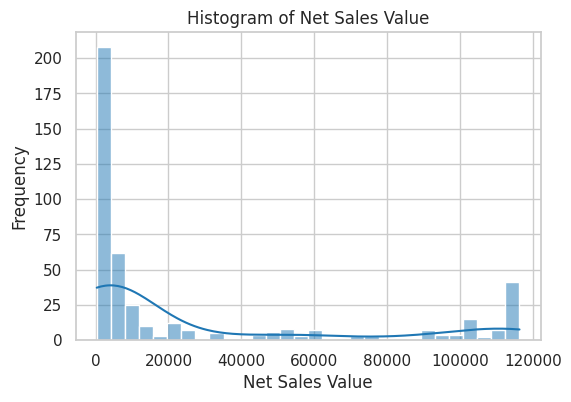

In [41]:
# Plot histograms
for col in numerical_cols:
    plt.figure(figsize=(6, 4))

    sns.histplot(
        df[col],
        bins=30,
        kde=True,                     # KDE for smooth distribution
        color=cs.TABLEAU_COLORS[list(cs.TABLEAU_COLORS.keys())[0]]
    )

    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

In [42]:
## INFERENCE
#The histograms illustrate the distribution of numerical variables such as Volume, Avg Price, Total Sales Value, Discount Rate (%), Discount Amount, and Net Sales Value.
#Most sales-related variables exhibit right-skewed distributions, indicating that higher sales values occur less frequently.
#The presence of long right tails in Total Sales Value and Net Sales Value suggests outliers caused by high-value transactions or bulk sales.
#Discount Rate (%) shows a more concentrated distribution, indicating standardized discount practices across products.

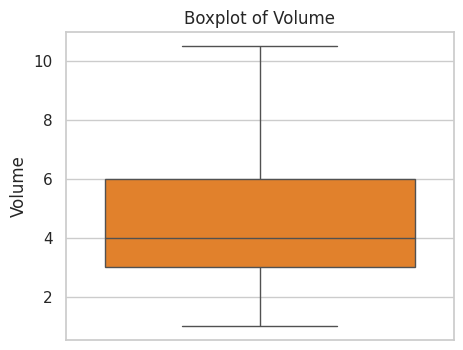

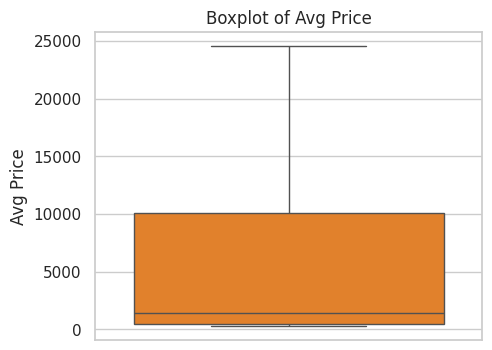

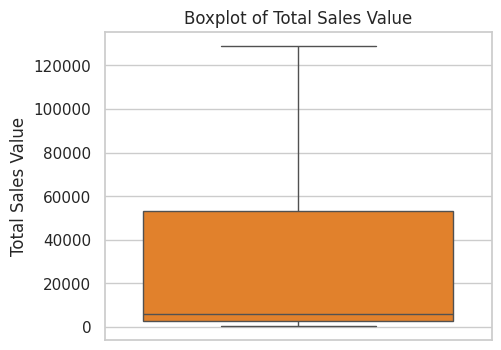

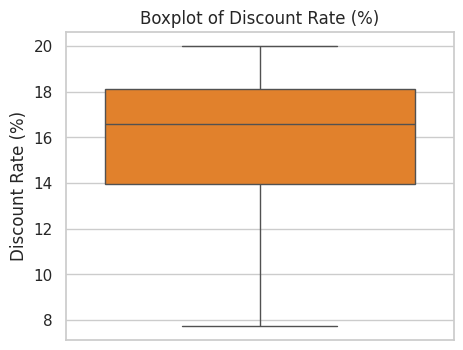

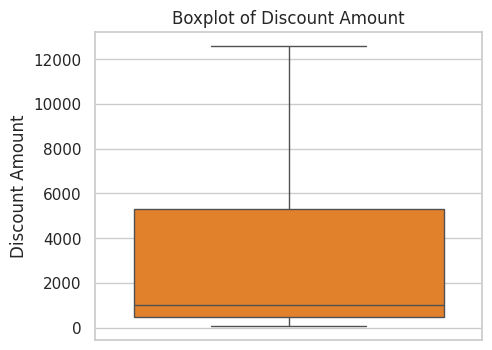

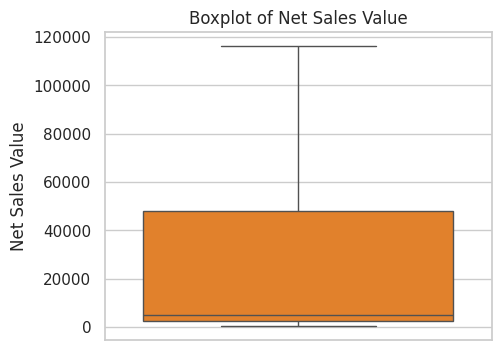

In [43]:
# Create boxplots for each numerical column
for col in numerical_cols:
    plt.figure(figsize=(5, 4))

    sns.boxplot(
        y=df[col],
        color=cs.TABLEAU_COLORS[list(cs.TABLEAU_COLORS.keys())[1]]
    )

    plt.title(f"Boxplot of {col}")
    plt.ylabel(col)
    plt.show()

In [ ]:
# INFERENCE
# Boxplots display the median and interquartile range (IQR) for each numerical variable, helping to understand data spread.
# Total Sales Value and Net Sales Value show several extreme outliers, indicating high-value transactions or bulk purchases.
# Avg Price also exhibits variability, reflecting differences across brands and models.
# Discount Rate (%) shows a relatively narrow IQR with fewer outliers, suggesting controlled and consistent discount policies.
# The presence of outliers in sales-related variables is expected in retail datasets and does not necessarily indicate data errors.

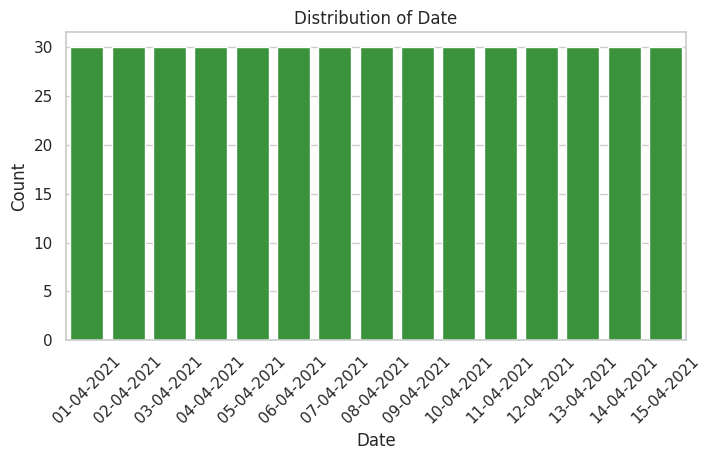

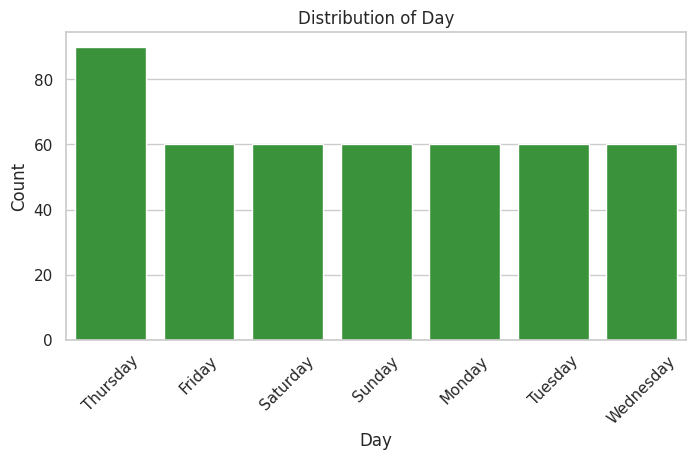

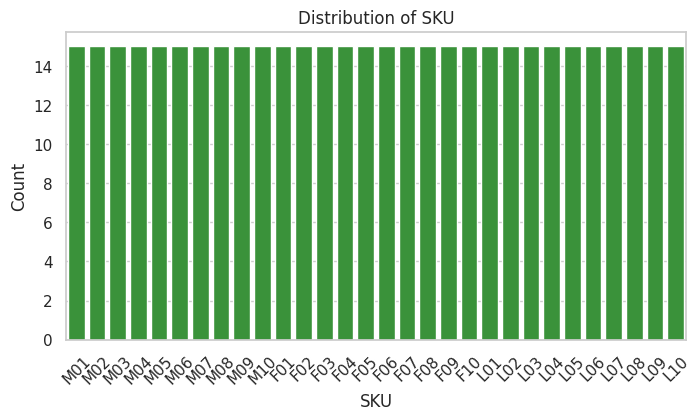

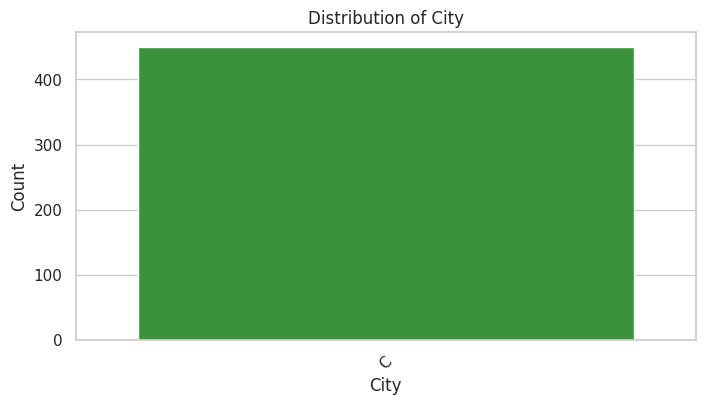

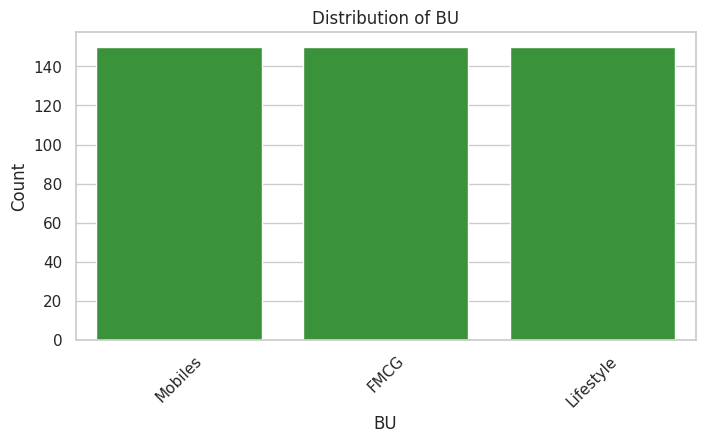

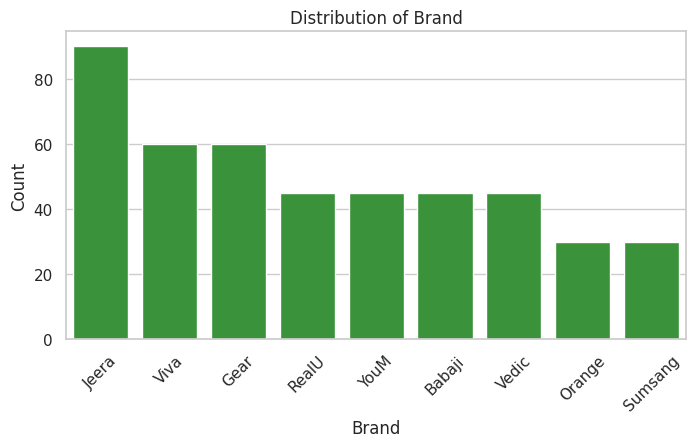

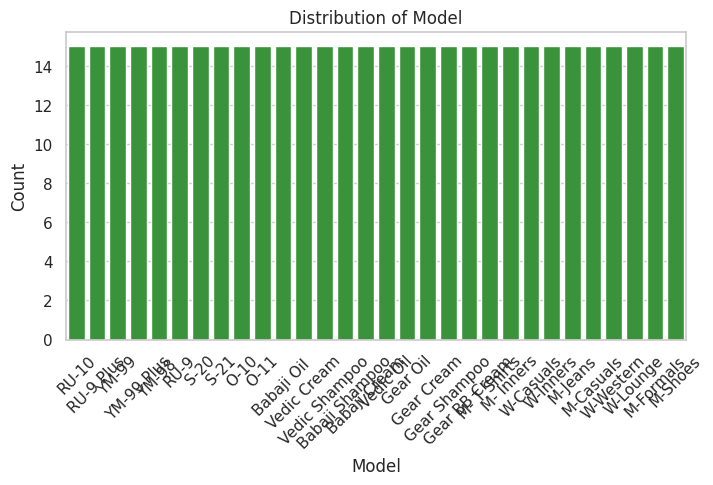

In [44]:
# Plot bar charts for categorical columns
for col in categorical_cols:
    plt.figure(figsize=(8, 4))

    sns.countplot(
        x=df[col],
        order=df[col].value_counts().index,
        color=cs.TABLEAU_COLORS[list(cs.TABLEAU_COLORS.keys())[2]]
    )

    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.xticks(rotation=45)
    plt.show()

In [ ]:
#inference
# Bar charts illustrate the frequency distribution of categorical variables such as Brand, Business Unit (BU), City, Day, SKU, and Model.
# The Business Unit distribution is balanced, with equal representation across FMCG, Lifestyle, and Mobiles, ensuring unbiased comparative analysis.
# Brand-wise distribution shows dominance of certain brands, indicating higher product representation or sales frequency.
# The Day-wise distribution indicates relatively uniform sales records across most days, with slightly higher activity on specific days.
# These visualizations help identify dominant categories, data balance, and potential business patterns.

In [45]:
# Standardization of Numerical Variables using StanadaardScaler



In [25]:
from sklearn.preprocessing import StandardScaler

In [26]:
# Initialize the scaler
scaler = StandardScaler()

# Apply standardization
df_scaled = df.copy()
df_scaled[numerical_cols] = scaler.fit_transform(df[numerical_cols])

# View scaled data
df_scaled[numerical_cols].head()


,Volume,Avg Price,Total Sales Value,Discount Rate (%),Discount Amount,Net Sales Value
0,2.133995,0.653958,2.185257,-0.929603,2.446327,2.159293
1,1.953012,0.422587,1.559089,-0.953669,2.207259,1.497922
2,0.867112,1.116699,1.821206,-1.490400,1.943947,1.809543
3,0.505145,1.579441,1.998190,-1.928310,1.350745,2.059311
4,-0.580756,0.191216,-0.159230,0.688245,0.318611,-0.202434


In [27]:
# Check mean and std after scaling
df_scaled[numerical_cols].mean()
df_scaled[numerical_cols].std()


,0
Volume,1.001113
Avg Price,1.001113
Total Sales Value,1.001113
Discount Rate (%),1.001113
Discount Amount,1.001113
Net Sales Value,1.001113


In [28]:
## Standardize Numerical Columns Using Formula


# z= x−μ/σ
# Where:
#x = original value
#μ (mu) = mean of the variable
#σ (sigma) = standard deviation of the variable
#z = standardized value

In [36]:
means = df[numerical_cols].mean()
stds = df[numerical_cols].std()


In [38]:
df_zscore = df.copy()
df_zscore[numerical_cols] = (df[numerical_cols] - means) / stds


In [41]:
# Before Standardization
df[numerical_cols].describe()

,Volume,Avg Price,Total Sales Value,Discount Rate (%),Discount Amount,Net Sales Value
count,450.000000,450.000000,450.000000,450.000000,450.000000,450.000000
mean,4.604444,6447.100000,31407.502222,15.298219,3140.918968,28189.030727
std,2.765759,8653.756795,44686.313870,3.923669,3871.173841,40858.528122
min,1.000000,290.000000,400.000000,7.740579,69.177942,326.974801
25%,3.000000,465.000000,2700.000000,13.965063,460.459304,2202.208645
50%,4.000000,1450.000000,5700.000000,16.577766,988.933733,4677.788059
75%,6.000000,10100.000000,53200.000000,18.114718,5316.495427,47847.912852
max,10.500000,24552.500000,128950.000000,19.992407,12600.549611,116316.469161


In [42]:
# After Standardization
df_zscore[numerical_cols].describe()

,Volume,Avg Price,Total Sales Value,Discount Rate (%),Discount Amount,Net Sales Value
count,4.500000e+02,4.500000e+02,4.500000e+02,4.500000e+02,4.500000e+02,4.500000e+02
mean,-1.263187e-16,-7.894919e-18,3.157968e-17,-5.131698e-17,9.868649e-17,-1.578984e-17
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-1.303239e+00,-7.114945e-01,-6.938926e-01,-1.926167e+00,-7.934909e-01,-6.819153e-01
25%,-5.801100e-01,-6.912720e-01,-6.424227e-01,-3.397730e-01,-6.924152e-01,-6.360195e-01
50%,-2.185456e-01,-5.774486e-01,-5.752880e-01,3.261096e-01,-5.558999e-01,-5.754305e-01
75%,5.045832e-01,4.221172e-01,4.876772e-01,7.178228e-01,5.619940e-01,4.811451e-01
max,2.131623e+00,2.092201e+00,2.182827e+00,1.196377e+00,2.443608e+00,2.156892e+00


In [ ]:
## observation

# Before standardization, numerical variables were on different scales, leading to skewed and incomparable distributions.
# After applying Z-score normalization, all variables show centered distributions around zero with similar spread.
# Standardization preserves the shape of the distribution while changing the scale.
# This transformation makes the dataset more suitable for analytical and machine learning models.

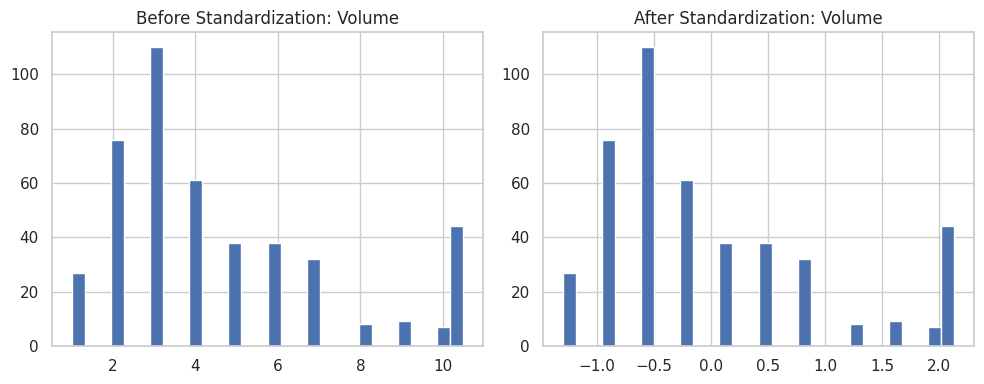

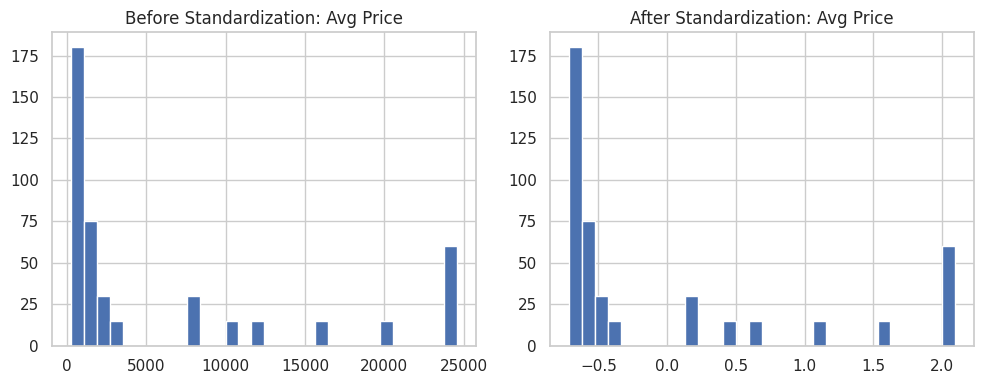

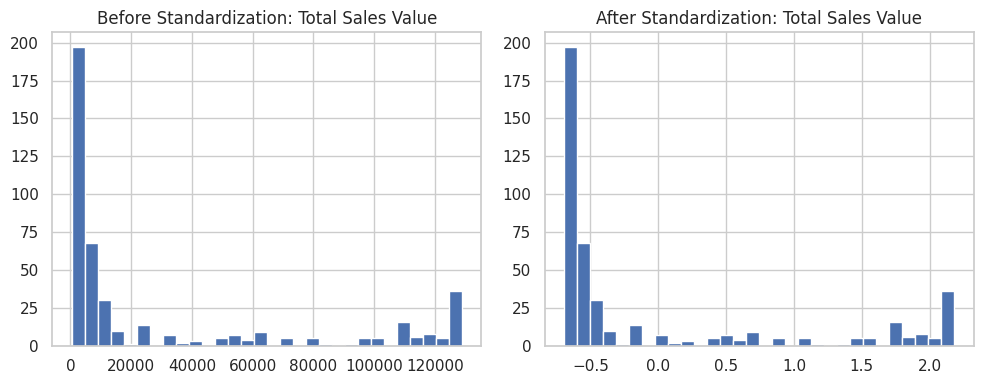

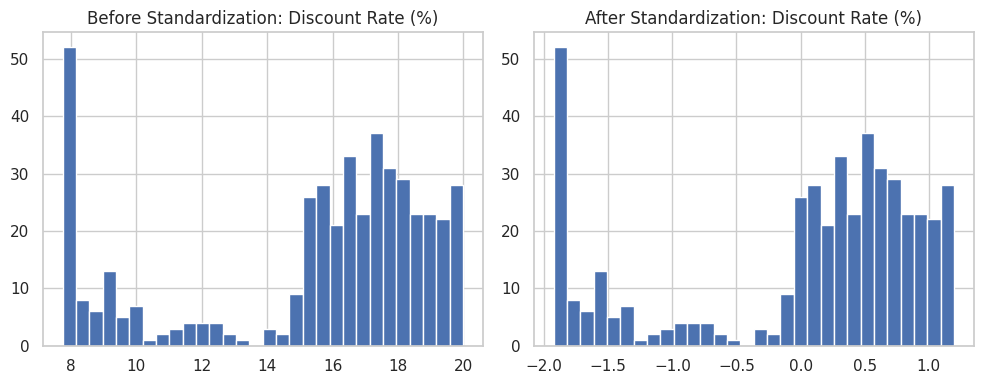

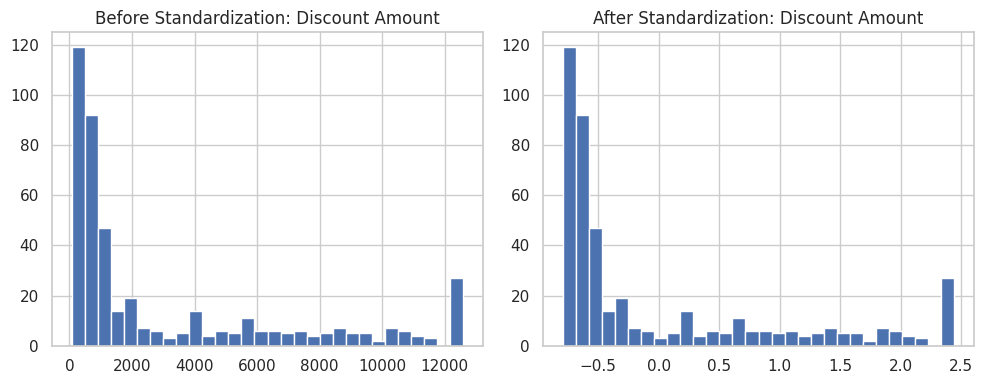

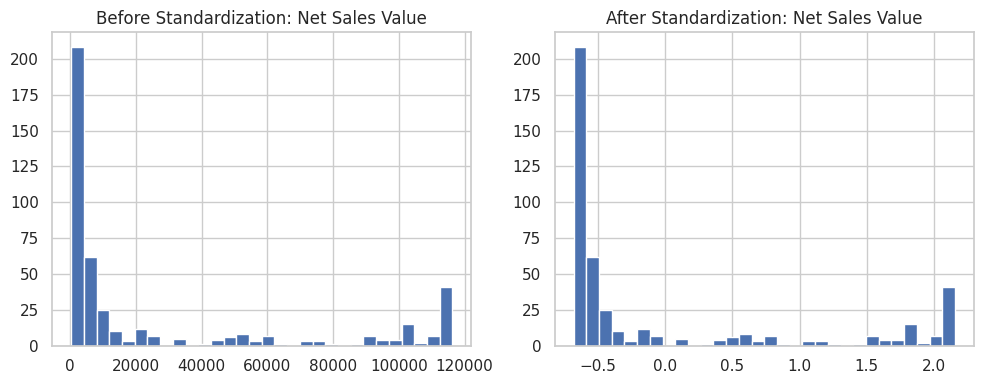

In [43]:
for col in num_cols:
    plt.figure(figsize=(10, 4))

    plt.subplot(1, 2, 1)
    plt.hist(df[col], bins=30)
    plt.title(f'Before Standardization: {col}')

    plt.subplot(1, 2, 2)
    plt.hist(df_zscore[col], bins=30)
    plt.title(f'After Standardization: {col}')

    plt.tight_layout()
    plt.show()
